In [9]:
import torch
import os 
import numpy as np
from albumentations.augmentations import transforms
from albumentations.core.composition import Compose, OneOf
from albumentations import HorizontalFlip, ElasticTransform, Compose
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import cv2

alpha=0.5,alpha_affine=0.5,sigma=5,p=1

In [11]:
# transformations = Compose([
#                 transforms.HorizontalFlip(p=0),
#                 transforms.ElasticTransform(alpha=1.2,alpha_affine=4,sigma=5,p=1),
#                 ToTensorV2()
#             ])

transformations = Compose([
    HorizontalFlip(p=0.5),  # Set p=0.5 or another probability as needed
    ElasticTransform(alpha=1.2, alpha_affine=4, sigma=5, p=1),
    ToTensorV2()
])


In [2]:
# image = '/home/LUNG_DATA/Image/LIDC-IDRI-0001/0001_nodule0_slice03.npy'
# mask = '/home/LUNG_DATA/Mask/LIDC-IDRI-0001/0001_mask0_slice03.npy'

image = '/dcs/22/u2202609/year_3/cs310/Project/Preprocessing/data/Image/LIDC-IDRI-0003/0003_NI000_slice003.npy'
mask = '/dcs/22/u2202609/year_3/cs310/Project/Preprocessing/data/Mask/LIDC-IDRI-0003/0003_MA000_slice003.npy'

In [3]:
image0= np.load(image)
mask0 = np.load(mask)

In [4]:
image0 = image0.reshape(512,512,1)
mask0 = mask0.reshape(512,512,1)

In [5]:
print(image0.shape,mask0.shape)

(512, 512, 1) (512, 512, 1)


In [6]:
mask0 = mask0.astype('uint8')

In [12]:
augmented = transformations(image=image0,mask=mask0)

In [13]:
augment0 = augmented['image']
mask_aug = augmented['mask']

In [14]:
augment0.shape

torch.Size([1, 512, 512])

In [15]:
mask_aug.shape

torch.Size([512, 512, 1])

In [16]:
mask_aug= mask_aug.reshape([1,512,512])

In [17]:
image0.shape

(512, 512, 1)

In [18]:
mask0.shape

(512, 512, 1)

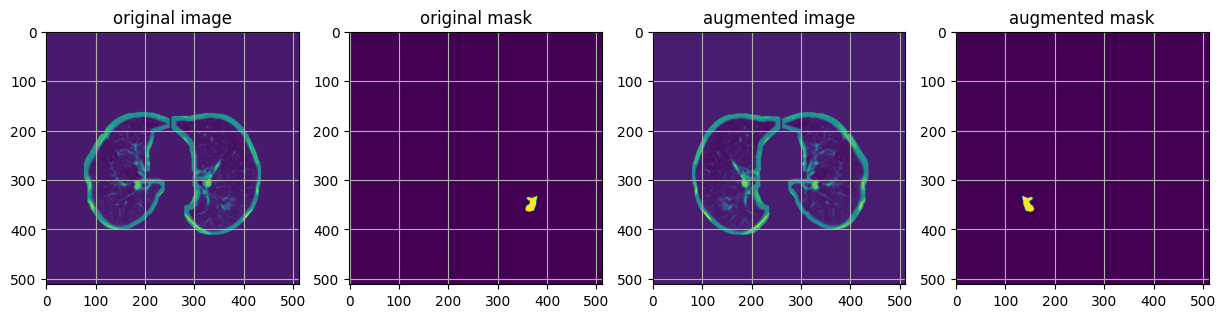

In [19]:
f, ax = plt.subplots(1,4,figsize=(15,15))
ax[0].imshow(image0[:,:,0])
ax[0].grid()
ax[1].imshow(mask0[:,:,0])
ax[1].grid()
ax[2].imshow(augment0[0,:,:])
ax[2].grid()
ax[3].imshow(mask_aug[0,:,:])
ax[3].grid()
ax[0].set_title("original image")
ax[1].set_title("original mask")
ax[2].set_title("augmented image")
ax[3].set_title("augmented mask")
plt.savefig('augmented.png',dpi=300)

In [15]:
np.unique(augment0[0,:,:])

array([-0.22121271, -0.22067926, -0.22009869, ...,  4.30100468,
        4.31262581,  4.45815377])

In [16]:
np.unique(image0[:,:,0])

array([-0.22168608, -0.22142041, -0.22128756, ...,  4.42147923,
        4.4221406 ,  4.57437611])

In [17]:
image0 = image0.reshape(512,512,1)

In [18]:
mask0 = mask0.reshape(512,512,1)